# Statistics
Everything statistics related in Python.
## Imports
The most common ones

In [1]:
# Built-in Python modules
import math
import statistics

# External packages
import scipy.stats as st
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

## Interactive kernel
IPython supports interactive documentation and kernel commands. Use '?' to see documentation of the object, and '!' to run kernel command.

In [2]:
!pwd
?math.sqrt

/Users/kacperkedzierski/Documents/Projects/Statistics/everything-statistics


Signature: math.sqrt(x, /)
Docstring: Return the square root of x.
Type:      builtin_function_or_method


## Plots
Matplotlib package allows creation of plots, which can be examined more deeply in Plot Viewer.

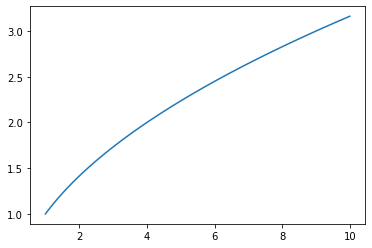

In [3]:
x = np.linspace(1,10,100) # Create a list (array) of evenly spaced 100 numbers over interval [1,10]
plt.plot(x, np.sqrt(x)) # Plot the square root of each x point
# Note that np.sqrt returns array-like object and differs from math.sqrt function
plt.show() # Show current plot

# Discrete probability distributions
The probability distribution of a discrete random variable is a graph, table, or formula that specifies the probability associated with each possible outcome the random variable can assume

## Binomial distribution
A binomial discrete random variable. binom, which is a function of $k$, takes as the shape parameters $n$ and $p$, and is defined as follows:

$P(k)=\binom{n}{k}p^{k}(1-p)^{n-k}$ , where:

$k$ - (desired) number of succeses,

$n$ - number of trails (sample size),

$p$ - probability of success on a single trail


In [4]:
st.binom

### Exercise
A 2019 GUS survey suggests that 26.2% of Poles are obese.
Among a random sample of 10 Poles, what is the probability that exactly 8 are obese?

In [5]:
# A binomial distribution
rv = st.binom(n = 10, p = 0.262)
rv.pmf(k = 8)

0.0005441712184877579

### Exercise
Study found that approximately 25% of Facebook users are considered power users. The same study found that the average Facebook user has 245 friends. What is the probability that the average Facebook user with 245 friends has 70 or more friends who would be considered power users?

In [6]:
# Assuming every user in the friend list is independent from each other,
# we can use binomial probability distribution.
rv = st.binom(n = 245, p = 0.25)
# P(X>=70) = 1 - P(X<=69)
1 - rv.cdf(69)

0.11276297589148432

### Exercise
If a passing proportion for a course given repeatedly is assumed to be 0.80 on average, and there are 250 students who are taking the exam each time, what is the expected value, $\mu$ and standard deviation, $\sigma$, for the number of students who do not pass the exam for a randomly selected course?

In [7]:
# We are interested in students who fail to pas the exam.
# Knowing that p = 0.8 on average pass the course, q = 1 - 0.8 do not pass.
# Assuming students attempt the exam independently, we can use binomial
# probability ditribution.
rv = st.binom(n = 250, p = 0.2)
print(f"{rv.mean()}" + " - expected value/mean ")
print(f"{rv.var()}" + " - variance ")
print(f"{math.sqrt(rv.var())}" + " - standard deviation ")

50.0 - expected value/mean 
40.0 - variance 
6.324555320336759 - standard deviation 


### Exercise
According to a recent survey 96% of all customers in grocery stores pay cash while the rest use their credit or cash card. You are currently waiting in the queue at the checkout of a grocery store with 8 customers in front of you. What is the probability (in percent) that 2 or more of the other customers pay with their card?

In [8]:
# A binomial distribution
rv = st.binom(n = 8, p = 1 - 0.96)
# P(X>=2) = 1 - P(X<2) = 1 - P(X<=1) for discrete distribution
1 - rv.cdf(1)

0.038147228021555235

## Negative binomial distribution
A negative discrete random variable. nbinom, which is a function of $k$, takes as the shape parameters $n$ and $p$, and is defined as follows:

$P(k)=\binom{k+n-1}{n-1}p^{n}(1-p)^{k}$ , where:

$k$ - number of failures (number of trails - n),

$n$ - (desired) number of successes,

$p$ - probability of success on a single trail


In [9]:
st.nbinom

### Exercise
A college student working at a psychology lab is asked to recruit 10 couples to participate in a study. She decides to stand outside the student center and ask every 5th person leaving the building whether they are in a relationship and, if so, whether they would like to participate in the study with their significant other. Suppose the probability of finding such a person is 10%. What is the probability that she will need to ask 30 people before she hits her goal?

In [10]:
# A negative binomial distribution
rv = st.nbinom(n = 10, p = 0.1)
rv.pmf(k = 30 - 10)

0.00012175908036078153

## Poisson distribution
A poisson discrete random variable. poissonn, which is a function of $k$, takes as the shape parameters $mu$, and is defined as follows:

$P(k)=exp(-\mu)\frac{\mu^k}{k!}$ , where:

$k$ - (desired) number of occurrences (successes),

$mu$ - mean number of occurences in the given peroid of time, area etc.

In [11]:
st.poisson

### Exercise
Suppose that in a rural region of a developing country electricity power failures occur following a Poisson distribution with an average of 2 failures every week. Calculate the probability that in a given week the electricity fails only once.

In [12]:
# A Poisson distribution
rv = st.poisson(mu = 2)
rv.pmf(k = 1)

0.2706705664732254

### Exercise
Suppose that in a rural region of a developing country electricity power failures occur following a Poisson distribution with an average of 2 failures every week. Calculate the probability that on a given day the electricity fails three times.

In [13]:
# A Poisson distribution
# We need to calculate the average number of failures per day
mu = 2/7
rv = st.poisson(mu)
rv.pmf(k = 3)

0.0029211945309049027

## Hypergeometric distribution
A hypergeometric discrete random variable. hypergeom, which is a function of $k$, takes as the shape parameters $M$, $n$ and $N$, and is defined as follows:

$P(k)=\frac{\binom{n}{k}\binom{M-n}{N-k}}{\binom{M}{N}}$ , where:

$k$ - Number of successes in the N elements,

$M$ - the total number of elements,

$n$ - number of successes in the M elements,

$N$ - the number of elements drawn.

In [14]:
st.hypergeom

### Exercise
Suppose a customer at a pet store wants to buy two hamsters for his daughter, but he wants two males or two females (i.e., he wants only two hamsters in a few months). If there are ten hamsters, five male and five female, what is the probability of drawing two of the same sex?

In [15]:
# A hypergeometric distirubion
rv = st.hypergeom(M = 10, n = 5, N = 2)
# We are interested in either pulling two female hamsters, or two male hamsters. 
# Since P(Female = 2) = P(Male = 2), we can denote the answer as 2 * P(2)
ans = 2 * rv.pmf(k = 2)
ans

0.4444444444444448

# Continuous probability distributions
The probability distribution of a continuous random variable is a graph, table, or formula that specifies the probability associated with each possible outcome the random variable can assume. Because there are infinite amount of values of x, the probability of x taking any specific value is 0. Therefore it is more intiutive to consider intervals.

## Uniform distribution
A uniform continuous random variable. uniform takes as a shape parameters $loc$ and $scale$, and its **cumulative distribution function** (CDF) is defined as follows:

$P(k)=\frac{k-loc}{scale}$ , where:

$k$ - upper boundary of interest,

$loc$ - lower boundary of domain,

$scale$ - displacement vector such that (loc + scale) is upper boundary of domain

In [16]:
st.uniform

### Exercise
Suppose in a quiz there are 30 participants.
A question is given to all 30 participants and the time allowed to answer it is 25 seconds.
Find the probability of participants responds within 6 seconds?

In [17]:
# A uniform distribution
rv = st.uniform(loc = 0, scale = 25)
rv.cdf(6)

0.24

## Normal distribution
A normal continuous random variable. norm takes as a shape parameters $loc$ and $scale$, where $loc$ specifies the mean and $scale$ specifies the standard deviation, and its probability density function is defined as follows: 

$f{{\left({x}\right)}}=\frac{1}{{\sigma\sqrt{{{2}\pi}}}}{e}^{{-{\left({x}-\mu\right)}^{2}\text{/}{2}\ \sigma^{2}}}$ , where:

$\mu$ = $loc$ - mean,

$\sigma$ = $scale$ - standard deviation

In [18]:
st.norm

### Percentiles
Percentile is the percentage of observations that fall below a given data point. Graphically, percentile is the area below the probability distribution curve to the left of that observation. To calculate percentiles, we use *cdf* method:

In [19]:
st.norm(loc = 1000, scale = 250).cdf(1245)

0.8364569406723077

To find an exact point below which falls given percentage of observations, we use the inverse of cumulative distribution function, percent point function - $ppf$ method:

In [20]:
st.norm(loc = 36.5, scale = 0.7).ppf(0.1)

35.60291390411878

### Exercise
At Heinz ketchup factory the amounts which go into bottles of ketchup are supposed to be normally distributed with mean 36 oz. and standard deviation 0.11 oz.
Once every 30 minutes a bottle is selected from the production line, and its contents are noted precisely. If the amount of ketchup in the bottle is below 35.8 oz. or above 36.2 oz., then the bottle fails the quality control inspection. What percent of bottles have less than 35.8 ounces of ketchup? What percent of bottles pass the quality control inspection? 

In [21]:
# A normal distribution
rv = st.norm(loc = 36, scale = 0.11)
ans_1 = rv.cdf(35.8)
print(f"{ans_1*100}" + "% of bottles have less than 35.8 ounces of ketchup")
ans_2 = rv.cdf(36.2) - rv.cdf(35.8)
print(f"{ans_2*100}" + "% of bottles pass the quality control inspection")

3.4518173997205635% of bottles have less than 35.8 ounces of ketchup
93.09636520055888% of bottles pass the quality control inspection


### Exercise
Body temperatures of healthy humans are distributed nearly normally with mean 98.2 F and standard deviation 0.73 F. What is the cutoff for the lowest 3% of human body temperatures? What is the cutoff for the highest 10% of human body temperatures?

In [22]:
# A normal distribution
rv = st.norm(loc = 98.2, scale = 0.73)
ans_1 = rv.ppf(0.03)
print(f"{ans_1}" + " F - cutoff for the lowest 3% of observations")
ans_2 = rv.ppf(0.9)
print(f"{ans_2}" + " F - cutoff for the highest 10% of observations")

96.82702066604959 F - cutoff for the lowest 3% of observations
99.13553264284756 F - cutoff for the highest 10% of observations


# Sample statistics
In sampling statistics, we sample population to estimate a population parameter. The sampling distribution of a statistic is the distribution of all possible values of the statistic, computed from samples of the same size randomly drawn from the same population.

### Exercise
Nationally 74% of college freshman continue as sophomores. A particular school has 486 out of all 600 freshmen stay. Is this unusual?

In [23]:
# Such large sample can be approximated with normal distribution.
# We calculate the parameters using binomial distribution parameters
n = 600
p = 0.74
mu = n * p
sigma = math.sqrt(n * p * (1-p))
# We create normal distribution instance using calculated parameters
rv = st.norm(loc = mu, scale = sigma)
# 486 falls above 99.7 % of observations, thus is considered unusual.
ans = "Yes" if rv.cdf(486) > 0.997 else "No"
print(ans) 

Yes


### Exercise
A Teacher has a class of 68 students taking the midterm test. Assuming they are typical of the population, the result of whose scores are given, what is the probability the average score will be at least 3?

| 1     | 2     | 3     | 4     | 5     |
|-------|-------|-------|-------|-------|
| 0.215 | 0.188 | 0.247 | 0.217 | 0.133 |

In [24]:
# We need to estimate mean and standard deviation to use normal model
# Since we have no information about distibution, we use generic rv_discrete 
# class to ease the calculations
n = 68
rv = st.rv_discrete(values = (
    [1, 2, 3, 4, 5],
    [0.215, 0.188, 0.247, 0.217, 0.133])
    )
mu = rv.mean()
# Our sample size includes 68 observations
sigma = math.sqrt(rv.var() / n)
# Now we can create new normal model
rv = st.norm(loc = mu, scale = sigma)
# P(X>=3) = 1 - P(X<3)
1 - rv.cdf(3)

0.20194478054667075

### Exercise
A waitress earns varying tips with a mean of 10.90 dollars and sd of 5.60 dollars. Assume on the weekend she gets 60 tips.
- What is the probability she earns 750 dollars or more?
- On the best 5% of weekends, she earns at least how much dollars? (i.e. what does she make less than on 95% of weekends)?

In [25]:
# A normal distribution model
n = 60
# Expected value, mean, is equal to number of tips and mean value of every each one
mu = 10.90 * n
# D(Z)^2 = 60 * D(X)^2
sigma = 5.60 * math.sqrt(n)
rv = st.norm(loc = mu, scale = sigma)
# P(X>=750) = 1 - P(X<750)
ans_1 = 1 - rv.cdf(750)
print(f"{ans_1}" + " - probability she earns 750 dollars or more")
ans_2 = rv.ppf(0.95)
print(f"{ans_2}" + " - leats amount of dollars she makes durring 5% best weekends")

0.01344422705187287 - probability she earns 750 dollars or more
725.3494958862775 - leats amount of dollars she makes durring 5% best weekends


### Exercise
IQ Scores are normally distributed. Students at University A have IQ scores mean 130 and sd 6. At University B the mean is 120 and sd is 9.
If you compare a random student from each university, what is the probability the IQ score from the University A student will be higher by 5 points or more?
- IQ Scores from University A ~ $\mu$ = 130, $\sigma$ = 6
- IQ Scores from University B ~ $\mu$ = 120, $\sigma$ = 9

In [26]:
# We are interested in difference between IQ score of student from university A and 
# from university B
mu = 130 - 120
# D^2(Z) = D^2(X-Y) = D^2(X) + D^2(Y)
sigma = math.sqrt(6*6 + 9*9)
rv = st.norm(loc = mu, scale = sigma)
1 - rv.cdf(5)

0.6780490331101745

### Exercise
Males and females were asked about what they would do if they received a $100 bill by mail, addressed to their neighbor, but wrongly delivered to them.
Would they return it to their neighbor? Of the 69 males sampled, 52 said yes and of the 131 females sampled, 120 yes.
- Does the data indicate that the difference in proportions that said yes is usually a rule and is significantly greater than 10 percentage points?
- Provide 95% confidence interval

In [27]:
# We are interested in difference between proportions of sampled males and females
p_male = 52 / 69
p_fem = 120 / 131
# Assuming trails are independent, we can calculate variance and standard deviation
# from binomial distirubution
var_male = st.binom(n = 69, p = p_male).var()
var_fem = st.binom(n = 131, p = p_fem).var()
# E(Z) = E(X-Y) = E(X) - E(Y)
mu = p_fem - p_male
# D^2(Z) = D^2(X-Y) = D^2(X) + D^2(Y)
sigma = math.sqrt(var_fem + var_male)
rv = st.norm(loc = mu, scale = sigma)
ans_1 = "Yes" if rv.mean() > 0.10 else "No"
print(f"{ans_1}" + f", {rv.mean()}")
print(f"{rv.interval(0.95)}" + " - 95% confidence interval" )

Yes, 0.1624073459453479
(-9.21432134247101, 9.539136034361704) - 95% confidence interval


### Exercise
Assume that you would like to test whether proper amount of Cola is inside of Coca-Cola 330ml cans. For this purpose, you bought random amount of cola cans and measure the amount of cola inside of those cans. Determine a 0.98 confidence interval for the mean capacity of Coca-Cola cans. Check whether the sample is large enough to achieve 3% of accuracy.

Dataset is available [here](https://raw.githubusercontent.com/k-kedzierski/everything-statistics/main/src/midterm_data.csv).

In [28]:
# Import data using Pandas
df = pd.read_csv("https://raw.githubusercontent.com/k-kedzierski/everything-statistics/main/src/midterm_data.csv")
# First, we need to determine our sample size
n = len(df)
# Our sample size is small, thus we will use student-t distribution with t-scores
print(f"{st.t(n - 1).interval(0.98)}" + " - t-scores")
# st.sem takes as a parameter degrees of freedom
rv = st.t(df = n - 1, loc = df.x.mean(), scale = st.sem(df, ddof = n - 1))
interval = rv.interval(0.98)
print(f"{interval}" + " - 0.98 confidence interval")
# To check whether our sample is large enough, we need to calculate accuracy level
# from standard error
se = st.t(n - 1).interval(0.98)[1] * math.sqrt(df.x.var(ddof = n - 1) / n)
accuracy_level = se / df.x.mean()
print(f"{accuracy_level}" + " - accuracy level")

(-2.527977002740546, 2.527977002740546) - t-scores
(array([321.3236842]), array([338.84121577])) - 0.98 confidence interval
0.026535084747198102 - accuracy level


### Exercise
An auto insurance company has 22530 clients, and 28% of their clients submitted a claim in the past year. We took a sample of 224 clients.
- Determine a 99% confidence interval for the proportion of clients who didn't submit a claim last year.
- Check whether the sample is large enough to achieve 3% of accuracy.

In [29]:
# Assuming independency of trails, we can use normal approximation to
# binomial distribution
n = 224
mu = n * (1 - 0.28)
sigma = math.sqrt(n * 0.28 * (1 - 0.28))
rv = st.norm(loc = mu, scale = sigma)
interval = rv.interval(0.99)
print(f"{interval}" + " - 0.99 confidence interval")
# To check whether our sample is large enough, we need to calculate accuracy level
# from standard error
se = st.norm.interval(0.99)[1] * math.sqrt(rv.var() / n)
accuracy_level = se / rv.mean()
print(f"{accuracy_level}" + " - accuracy level")

(143.97042708015138, 178.58957291984862) - 0.99 confidence interval
0.007171034777300981 - accuracy level


## Other

In [30]:
n = 800
x = 586
p_hat = x/n # Point estimation for sample
lb = p_hat - 1.96 * math.sqrt((p_hat * (1-p_hat))/n) # qnorm(0.95)
ub = p_hat + 1.96 * math.sqrt((p_hat * (1-p_hat))/n)
interval = [lb,ub]